In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datasets = sns.get_dataset_names()
print(datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
data = sns.load_dataset('car_crashes')
data.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [9]:
print("Basic Info about the dataset:")
data.info()

Basic Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [6]:
print("No of null values in each column:")
data.isnull().sum()

No of null values in each column:


total             0
speeding          0
alcohol           0
not_distracted    0
no_previous       0
ins_premium       0
ins_losses        0
abbrev            0
dtype: int64

In [10]:
print("Statistics for numerical features in dataset:")
data.describe()

Statistics for numerical features in dataset:


,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


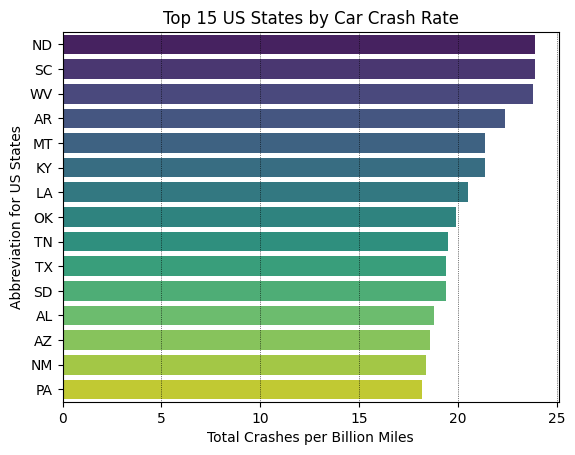

In [42]:
top_15 = data.sort_values('total', ascending=False).head(15)
plt.grid(color='black',linestyle=':',linewidth=0.5)
sns.barplot(y=top_15.abbrev, x=top_15.total, hue=top_15.abbrev, palette='viridis')
plt.title("Top 15 US States by Car Crash Rate")
plt.xlabel("Total Crashes per Billion Miles")
plt.ylabel("Abbreviation for US States")
plt.show()

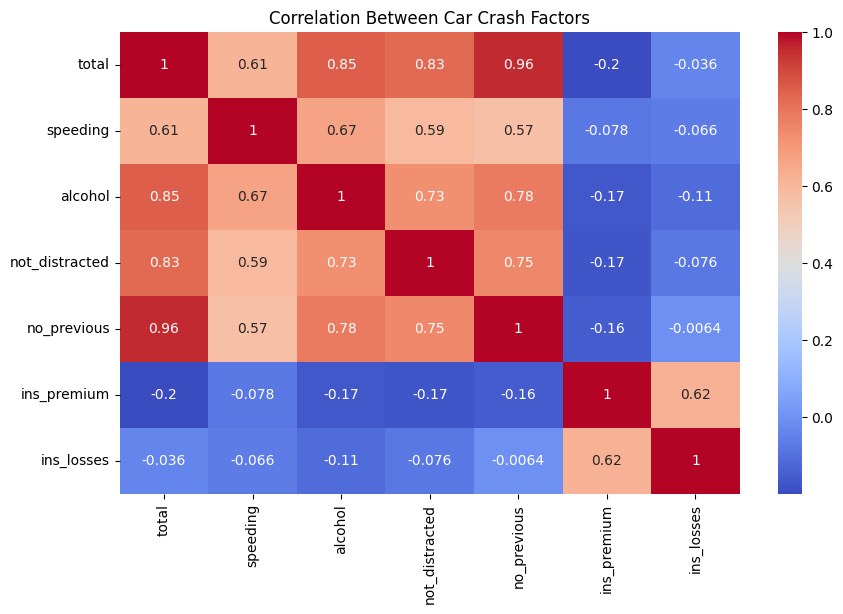

In [52]:
df = data[['total','speeding','alcohol','not_distracted','no_previous','ins_premium','ins_losses']]
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Car Crash Factors')
plt.show()

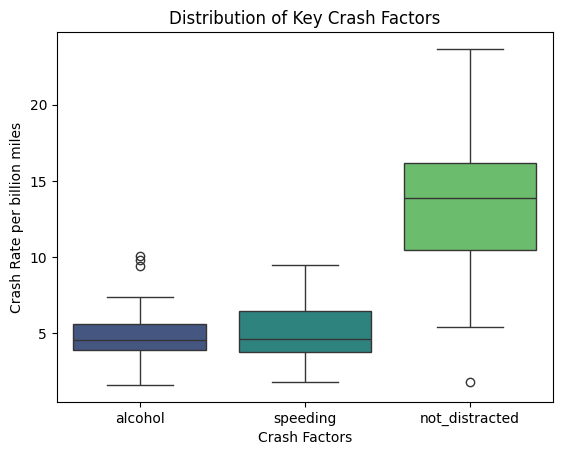

In [74]:
sns.boxplot(data=data[['alcohol', 'speeding', 'not_distracted']], palette='viridis')
plt.title('Distribution of Key Crash Factors')
plt.ylabel('Crash Rate per billion miles')
plt.xlabel('Crash Factors')
plt.show()

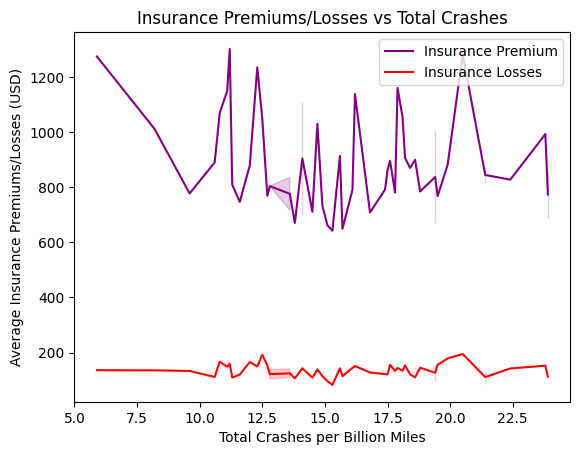

In [99]:
sns.lineplot(data=data, y='ins_premium', x='total', color='purple', label='Insurance Premium')
sns.lineplot(data=data, y='ins_losses', x='total',color='red', label='Insurance Losses')
plt.title('Insurance Premiums/Losses vs Total Crashes')
plt.ylabel('Average Insurance Premiums/Losses (USD)')
plt.xlabel('Total Crashes per Billion Miles')
plt.show()

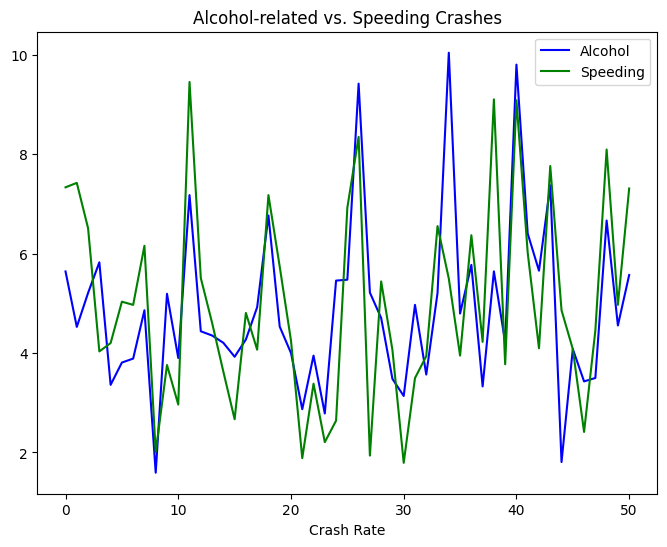

In [143]:
plt.figure(figsize=(8,6))
sns.lineplot(data.alcohol, color='blue',label='Alcohol')
sns.lineplot(data.speeding, color='green',label='Speeding')
plt.title('Alcohol-related vs. Speeding Crashes')
plt.xlabel('Crash Rate')
plt.ylabel('')
plt.legend()
plt.show()